# Limpeza de Dados

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados0=pd.read_csv('./Tabulador_Hospitalar/rhc00.csv')
dados1=pd.read_csv('./Tabulador_Hospitalar/rhc01.csv')
dados2=pd.read_csv('./Tabulador_Hospitalar/rhc02.csv')
dados3=pd.read_csv('./Tabulador_Hospitalar/rhc03.csv')
dados4=pd.read_csv('./Tabulador_Hospitalar/rhc04.csv')
dados5=pd.read_csv('./Tabulador_Hospitalar/rhc05.csv')
dados6=pd.read_csv('./Tabulador_Hospitalar/rhc06.csv')
dados7=pd.read_csv('./Tabulador_Hospitalar/rhc07.csv')
dados8=pd.read_csv('./Tabulador_Hospitalar/rhc08.csv')
dados9=pd.read_csv('./Tabulador_Hospitalar/rhc09.csv')
dados10=pd.read_csv('./Tabulador_Hospitalar/rhc10.csv')
dados11=pd.read_csv('./Tabulador_Hospitalar/rhc11.csv')
dados12=pd.read_csv('./Tabulador_Hospitalar/rhc12.csv')
dados13=pd.read_csv('./Tabulador_Hospitalar/rhc13.csv')
dados14=pd.read_csv('./Tabulador_Hospitalar/rhc14.csv')
dados15=pd.read_csv('./Tabulador_Hospitalar/rhc15.csv')
dados16=pd.read_csv('./Tabulador_Hospitalar/rhc16.csv')
dados17=pd.read_csv('./Tabulador_Hospitalar/rhc17.csv')
dados18=pd.read_csv('./Tabulador_Hospitalar/rhc18.csv')
dados19=pd.read_csv('./Tabulador_Hospitalar/rhc19.csv')
dados20=pd.read_csv('./Tabulador_Hospitalar/rhc20.csv')

In [3]:
juntos=[dados0,dados1,dados2,dados3,dados4,dados5,dados6,dados7,dados8,dados9,dados10,dados11,dados12,dados13,dados14,dados15,
        dados16,dados17,dados18,dados18,dados19,dados20]

In [4]:
dadost=pd.concat(juntos)

In [5]:
dadost.sort_index(axis=1, inplace=True)

In [6]:
dadost['DATAOBITO'].fillna('Sem Info', inplace=True)

In [7]:
for i in range(0,len(dadost)):
    if dadost.iloc[i,9]=='  /  /' or dadost.iloc[i,9]=='/  /':
        dadost.iloc[i,9]='Sem Info'

In [8]:
indexx=[]
i=0
for i in range(0,len(dadost)):
    indexx.append(i)

In [9]:
dadost.index=indexx

In [10]:
dadost.replace(0,9, inplace=True)

In [11]:
for i in range(0,len(dadost)):
    if dadost.iloc[i,dadost.columns.get_loc('ESTADRES')]=='99' or dadost.iloc[i,17]=='77':
        dadost.iloc[i,dadost.columns.get_loc('ESTADRES')]='Sem Info'
    if dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]=='99':
        dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]='Sem Info'
    if dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]=='EX':
        dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]='ES'

In [12]:
exclui_idade=dadost[dadost['IDADE']==999].index
dadost.drop(exclui_idade, inplace=True)

In [13]:
dadost.insert(18,'REGIAO','ok')

In [14]:
norte=['AM','AC','RO','RR','PA','AP','TO']
nordeste=['MA','CE','PI','RN','PB','PE','AL','SE','BA']
centro_oeste=['MT','MS','GO','DF']
sudeste=['MG','SP','RJ','ES']
sul=['PR','SC','RS']
for i in range(0,len(dadost)):
    if dadost.iloc[i,17] in norte:
        dadost.iloc[i,18]='Norte'
    elif dadost.iloc[i,17] in nordeste:
        dadost.iloc[i,18]='Nordeste'
    elif dadost.iloc[i,17] in centro_oeste:
        dadost.iloc[i,18]='Centro-Oeste'
    elif dadost.iloc[i,17] in sudeste:
        dadost.iloc[i,18]='Sudeste'
    elif dadost.iloc[i,17] in sul:
        dadost.iloc[i,18]='Sul'
    else:
        dadost.iloc[i,18]='Sem Info'

In [15]:
dadost

,ALCOOLIS,ANOPRIDI,ANTRI,BASDIAGSP,BASMAIMP,CLIATEN,CLITRAT,CNES,DATAINITRT,DATAOBITO,...,PTNM,RACACOR,RZNTR,SEXO,TABAGISM,TIPOHIST,TNM,TPCASO,UFUH,VALOR_TOT
0,1,2002,9999.0,3,7,10,88,2269783,88/88/8888,Sem Info,...,888,1,9,2,1,8090/3,999,2,RJ,1
1,9,2002,2000.0,3,7,27,88,2269783,88/88/8888,Sem Info,...,888,9,9,1,9,8070/3,999,2,RJ,1
2,1,2002,9999.0,3,7,20,20,2269783,21/06/2002,Sem Info,...,888,1,8,2,1,8000/3,888,1,RJ,1
3,9,2002,9999.0,3,7,32,32,2269783,15/04/2002,Sem Info,...,999,1,3,1,3,8551/3,999,1,RJ,1
4,1,2002,9999.0,3,7,11,4,2269783,09/07/2002,Sem Info,...,999,1,8,2,3,8340/3,999,1,RJ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,9,2019,2020.0,2,3,24,24,2232995,09/03/2020,Sem Info,...,888,1,8,2,9,8000/3,300,1,RS,1
1118,1,2019,2020.0,3,7,24,24,2232995,09/03/2020,Sem Info,...,888,1,8,2,3,8140/3,400,1,RS,1
1119,9,2019,2020.0,2,3,24,24,2232995,09/03/2020,Sem Info,...,888,1,8,1,9,8000/3,100,1,RS,1
1120,9,2020,2020.0,3,7,24,24,2232995,09/03/2020,Sem Info,...,888,2,8,1,9,8010/3,400,1,RS,1


In [16]:
dadost['REGIAO'].value_counts()

Sul         581
Sudeste     406
Sem Info     80
Norte        28
Nordeste     23
Name: REGIAO, dtype: int64

# Região Nordeste

In [17]:
dados_nordeste=dadost[dadost['REGIAO']=='Nordeste']

In [18]:
idade_med_nordeste=dados_nordeste['IDADE'].mean()
idade_med_nordeste

58.08695652173913

# Região Norte

In [19]:
dados_norte=dadost[dadost['REGIAO']=='Norte']

In [20]:
idade_med_norte=dados_norte['IDADE'].mean()
idade_med_norte

61.75

# Região Sudeste

In [21]:
dados_sudeste=dadost[dadost['REGIAO']=='Sudeste']

In [22]:
idade_med_sudeste=dados_sudeste['IDADE'].mean()
idade_med_sudeste

55.31527093596059

# Região Sul

In [23]:
dados_sul=dadost[dadost['REGIAO']=='Sul']

In [24]:
idade_med_sul=dados_sul['IDADE'].mean()
idade_med_sul

59.802065404475044

In [25]:
orienc_sul=dados_sul['ORIENC'].value_counts(True)
orienc_sul

9    0.659208
1    0.311532
3    0.025818
2    0.003442
Name: ORIENC, dtype: float64

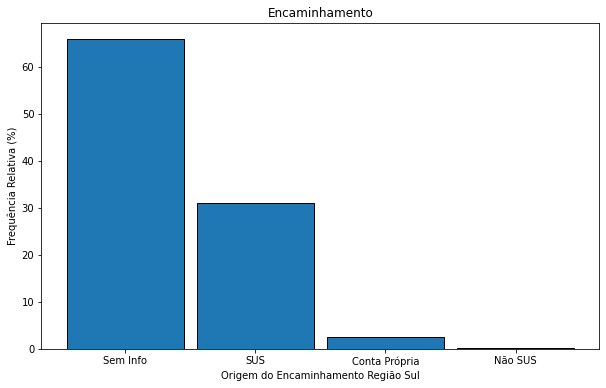

In [26]:
plt.figure(figsize=(10,6))
labels=['Sem Info','SUS','Conta Própria','Não SUS']
width_n=0.9
plt.bar(labels, orienc_sul*100, width=width_n,edgecolor='black')
plt.title('Encaminhamento')
plt.xlabel('Origem do Encaminhamento Região Sul')
plt.ylabel('Frequência Relativa (%)')
plt.show()

In [27]:
diag_sul=dados_sul['DIAGANT'].value_counts(True)
diag_sul

2    0.481928
1    0.351119
3    0.148021
9    0.018933
Name: DIAGANT, dtype: float64

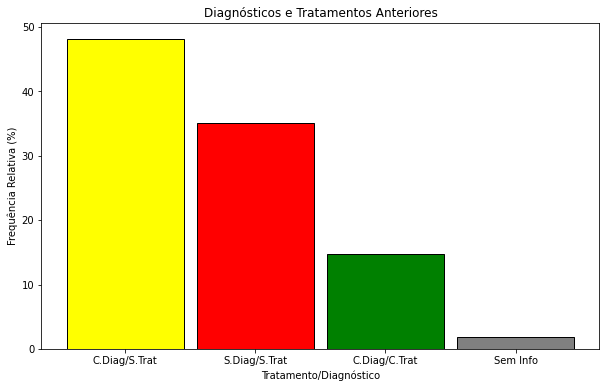

In [28]:
plt.figure(figsize=(10,6))
labels=['C.Diag/S.Trat', 'S.Diag/S.Trat', 'C.Diag/C.Trat', 'Sem Info']
cores=['yellow', 'red', 'green', 'gray', 'brown']
width_n=0.9
plt.bar(labels, diag_sul*100, width=width_n, color=cores,edgecolor='black')
plt.title('Diagnósticos e Tratamentos Anteriores')
plt.xlabel('Tratamento/Diagnóstico')
plt.ylabel('Frequência Relativa (%)')
plt.show()